# Import Libraries

In [12]:
import os
import numpy as np
import json
import random
from PIL import Image
import matplotlib.pyplot as plt

import torch
from torch.utils import data
from torchvision import transforms

from MSCOCO import COCO

# Dataset Interface

In [6]:
class MSCOCOInterface(data.Dataset):
    
    # constructor
    def __init__(self, root, imgs_path, captions_path):
        """
        Constructor of MS COCO Interface for get imgs and caps as tensors.
        :param root (str): location of the data on the disk
        :param imgs_path (str): location of img folder
        :param captions_path (str): location to the captions folder.
        """
        self.root = root
        self.imgs_path = imgs_path
        self.captions_path = captions_path
        self.imgs = os.listdir(os.path.join(self.root, self.imgs_path))
        self.coco = COCO(root, imgs_path, captions_path)
        
    
    # image transforms
    def img_transforms(self, img):
        transformer = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])
        
        return transformer(img)
        
    
    # load image as Image then transform it to tensor
    def load_img(self, idx):
        img = self.coco.get_img(idx)
        img = self.img_transforms(img)
        return img
    
    
    def get_captions(self, img_file_name):
        captions = self.coco.get_captions(img_file_name)
        return self.coco.get_captions(img_file_name)
    
    def display_img_with_captions(self, idx):
        img_file_name = self.imgs[idx]
        img = self.coco.get_img(idx)
        caps = self.get_captions(img_file_name)
        plt.imshow(img)
        plt.show()
        for cap in caps:
            print(cap)
        
    # return the length of the dataset
    def __len__(self):
        return len(self.imgs)
    
    # get an item from the dataset
    def __getitem__(self, idx):
        return idx

In [7]:
root = '../../Datasets/MS COCO'
imgs_path = 'train2017'
captions_path = 'annotations_trainval2017/annotations/captions_train2017.json'

interface_params = {
    'root': root,
    'imgs_path': imgs_path,
    'captions_path': captions_path
}

In [8]:
coco_interface = MSCOCOInterface(**interface_params)

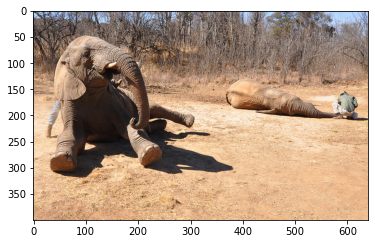

An elephant standing on top of a dirt field.
some elephants laying on the ground with some people looking at them
Two elephants sitting on the ground being trended to by two men.
Some elephants are laying down on the floor on a sunny day. 
Elephants lying in dirt with man nearby in open area.


In [28]:
random_idx = random.randint(0, len(coco_interface.imgs))
coco_interface.display_img_with_captions(random_idx)